# - Textual image enhancement using Denoising Autoencoders and Adaptive Histogram Equalization

In [2]:
# Importing all the necessary libraries
import os
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split

In [3]:
# Creating the path to the Dirty denoising dataset (performed on kaggle) 
input_path  = Path('../input/dirty-document-denoising')
train_data = input_path / 'train_613'
train_labels = input_path / 'train_cleaned'
test_images = input_path / 'test'

#Sorting out the order of the contents in the directory as 
train_images = sorted(os.listdir(train_data))
train_labels = sorted(os.listdir(train_labels))
test_images = sorted(os.listdir(test_images)) 

### - The following steps will be performed to obtain our Final Enhanced Image

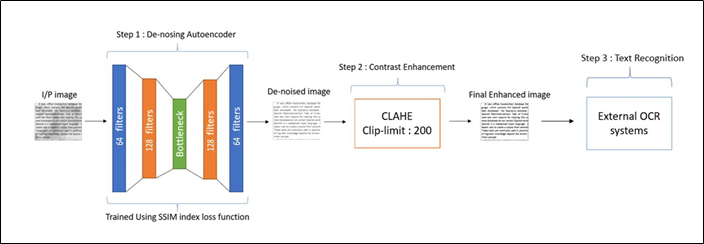

In [5]:
# We begin with building the step 1 of our model (De-noising Autoencoder)
def denoising_autoenocder():
    input_image = Input(shape=(420,540,1), name='image_input')
    
    #Encode block of the autoencoder
    model = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_image)
    model = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    model = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv2')(x)
    model = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #Decode block of the autoencoder
    model = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv3')(x)
    model = UpSampling2D((2,2), name='upsample1')(x)
    model = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    model = UpSampling2D((2,2), name='upsample2')(x)
    model = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    # Model Set-up
    autoencoder_step_1 = Model(inputs=input_image, outputs=model)
    autoencoder_step_1.compile(optimizer='adam', loss= SSIM_loss_function)
    return autoencoder

# Designing the loss function for our model
def SSIM_loss_function(X_valid, y_valid):
    return 1 - tf.reduce_mean(tf.image.ssim(X_valid, y_valid, 1.0))


In [6]:
autoencoder_step_1 = denoising_autoenocder()
autoencoder_step_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 420, 540, 1)]     0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 64)      640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 64)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 210, 270, 128)     73856     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 105, 135, 128)     0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 105, 135, 128)     147584    
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 210, 270, 128)    

In [7]:
# Splitting up training and validation sets
X = []
Y = []

for K in train_images:
    K = load_img(train / K, grayscale=True,target_size=(420,540))
    K = img_to_array(K).astype('float32')/255.
    X.append(K)

for L in train_labels:
    L = load_img(train_cleaned / L, grayscale=True,target_size=(420,540))
    L = img_to_array(L).astype('float32')/255.
    Y.append(L)

X = np.array(X)
Y = np.array(Y)
print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=42)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


In [9]:
autoencoder_step_1.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_valid, y_valid))

Epoch 1/100
13/13 [==============================] - 3s 232ms/step - loss: 0.4084 - val_loss: 0.3532
Epoch 2/100
13/13 [==============================] - 2s 149ms/step - loss: 0.3208 - val_loss: 0.2808
Epoch 3/100
13/13 [==============================] - 2s 150ms/step - loss: 0.2531 - val_loss: 0.2432
Epoch 4/100
13/13 [==============================] - 2s 149ms/step - loss: 0.2313 - val_loss: 0.2305
Epoch 5/100
13/13 [==============================] - 2s 148ms/step - loss: 0.2120 - val_loss: 0.2136
Epoch 6/100
13/13 [==============================] - 2s 149ms/step - loss: 0.1975 - val_loss: 0.1990
Epoch 7/100
13/13 [==============================] - 2s 152ms/step - loss: 0.1837 - val_loss: 0.1875
Epoch 8/100
13/13 [==============================] - 2s 151ms/step - loss: 0.1741 - val_loss: 0.1810
Epoch 9/100
13/13 [==============================] - 2s 150ms/step - loss: 0.1673 - val_loss: 0.1851
Epoch 10/100
13/13 [==============================] - 2s 149ms/step - loss: 0.1629 - val_lo

## - Step 1 prediction (Test image 1) :-

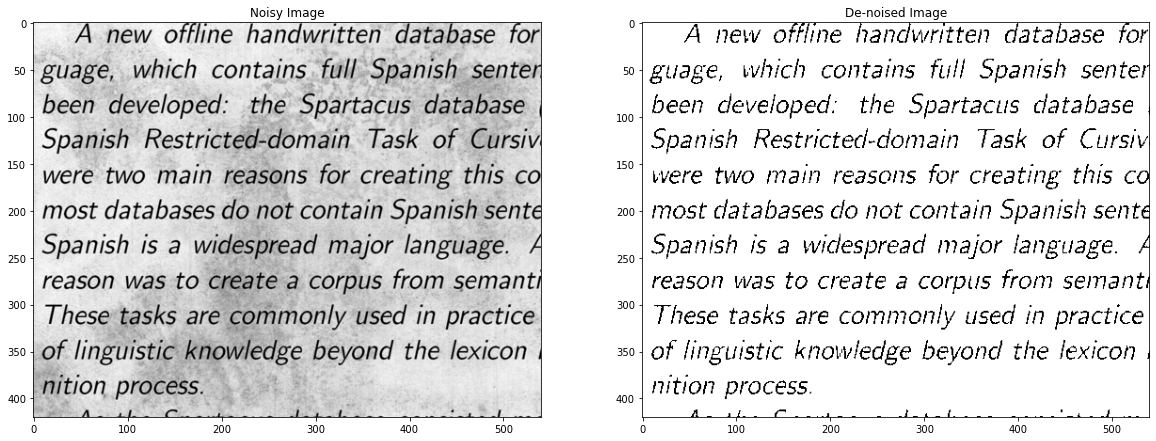

In [138]:
# Testing the model on the test sets
test_data_image_1 = load_img(test/ test_images[3], grayscale=True, target_size=(420,540))
test_data_image_1 = img_to_array(test_data_image_1)
test_data_image_1 = test_data_image_1.astype('float32')/255.
sample_test_img = np.expand_dims(test_data_image_1, axis=0)

# obtaining the De-noised Image
predicted_label = np.squeeze(autoencoder_step_1.predict(sample_test_img))
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[0].set_title('Noisy Image')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
ax[1].set_title('De-noised Image')
plt.show()

## - Step 2 prediction (Test image 1):-

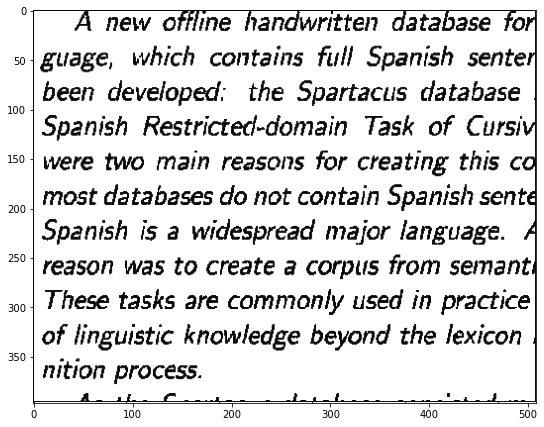

In [86]:
# In this step we will perform the Contrast enhacement portion of the algorithm
img = cv.imread('../input/output-1/1.PNG',0)
clahe = cv.createCLAHE(clipLimit=200, tileGridSize=(2,2))
cl1 = clahe.apply(img)
f, ax = plt.subplots(figsize=(9,9))
ax.imshow(cl1,cmap='gray')
ax.set_title('Implementing_CLAHE')

## - Step 1 prediction (Test image 2) :-

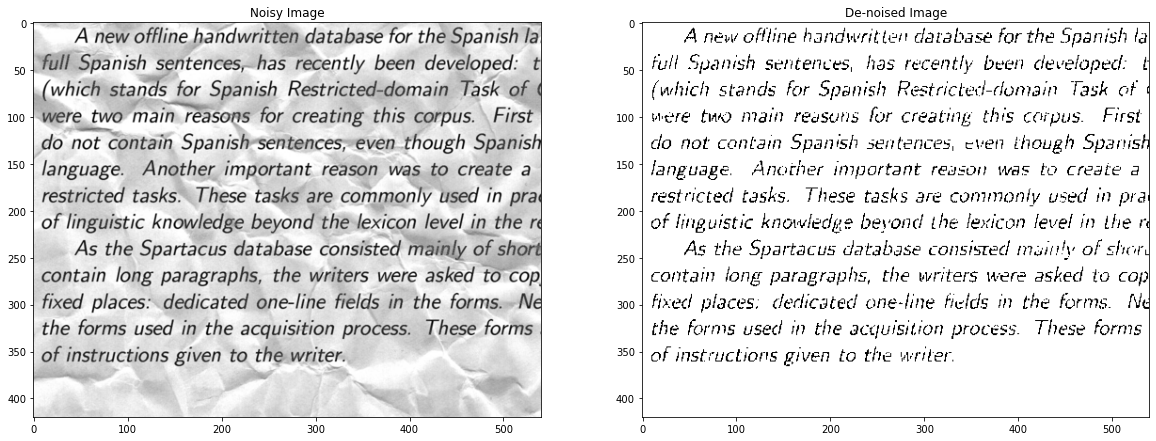

In [140]:
# Testing the model on the test sets
test_data_image_2 = load_img(test/ test_images[30], grayscale=True, target_size=(420,540))
test_data_image_2 = img_to_array(test_data_image_2)
test_data_image_2 = test_data_image_2.astype('float32')/255.
sample_test_img = np.expand_dims(test_data_image_2, axis=0)

# obtaining the De-noised Image
predicted_label = np.squeeze(autoencoder_step_1.predict(sample_test_img))
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[0].set_title('Noisy Image')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
ax[1].set_title('De-noised Image')
plt.show()

## - Step 2 prediction (Test image 2):-

Text(0.5, 1.0, 'Implementing_CLAHE')

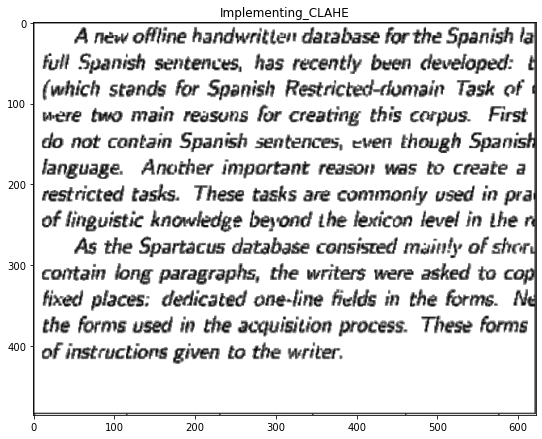

In [145]:
img = cv.imread('../input/output-2/2.PNG',0)
clahe = cv.createCLAHE(clipLimit=200, tileGridSize=(2,2))
cl1 = clahe.apply(img)
f, ax = plt.subplots(figsize=(9,9))
ax.imshow(cl1,cmap='gray')
ax.set_title('Implementing_CLAHE')

## - Step 1 prediction (Test image 3) :-

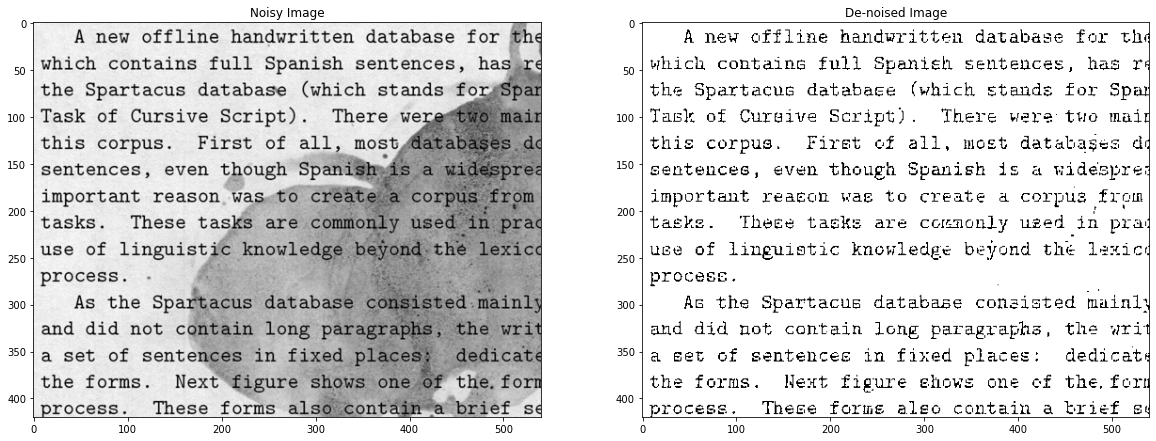

In [141]:
# Testing the model on the test sets
test_data_image_3 = load_img(test/ test_images[40], grayscale=True, target_size=(420,540))
test_data_image_3 = img_to_array(test_data_image_3)
test_data_image_3 = test_data_image_3.astype('float32')/255.
sample_test_img = np.expand_dims(test_data_image_3, axis=0)

# obtaining the De-noised Image
predicted_label = np.squeeze(autoencoder_step_1.predict(sample_test_img))
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[0].set_title('Noisy Image')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
ax[1].set_title('De-noised Image')
plt.show()

## - Step 2 prediction (Test image 3):-

Text(0.5, 1.0, 'Implementing_CLAHE')

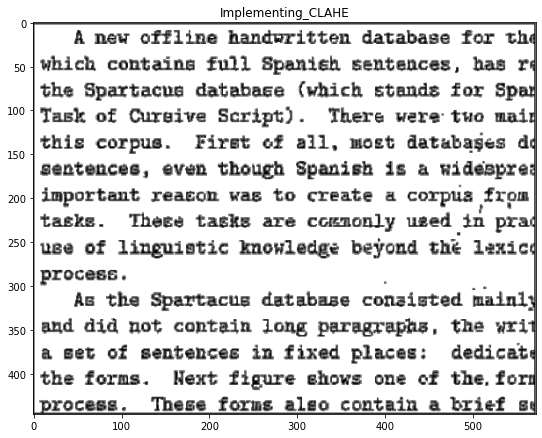

In [144]:
img = cv.imread('../input/output-3/3.PNG',0)
clahe = cv.createCLAHE(clipLimit=200, tileGridSize=(2,2))
cl1 = clahe.apply(img)
f, ax = plt.subplots(figsize=(9,9))
ax.imshow(cl1,cmap='gray')
ax.set_title('Implementing_CLAHE')